In [1]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

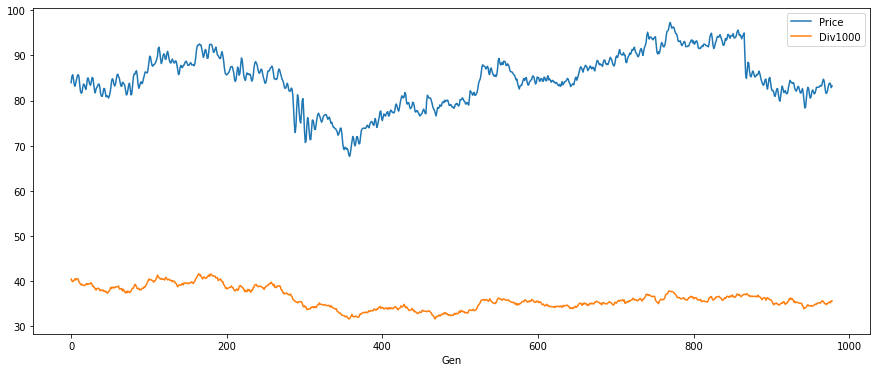

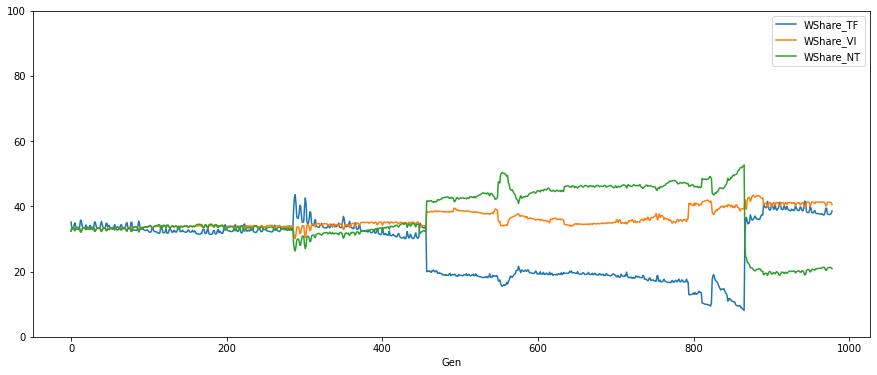

In [2]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.4791554918813608 1.62623396199285 0.1527777156743463
Annual mean returns  
[0.19427792866200413, 0.19580243321655696, 0.08167948706044803]
Annual std returns
[0.4054590460795709, 0.12040237616032387, 0.5346295871745598]
T test for Rf = 0, VI vs TF
T test value VI-TF is 4.769860320539681
T test value VI-NT is 0.08237342196593582
T test value TF-NT is -2.7401693087658723
confidence intervals at 95%
[0.41301579044427866, 0.5452951933184429]
[1.530773042844522, 1.721694881141178]
[0.08977137285758587, 0.21578405849110677]
Including r = 0.01 as risk free rate
[13.903067962322426, 33.1844548928321, 4.441526205315266]


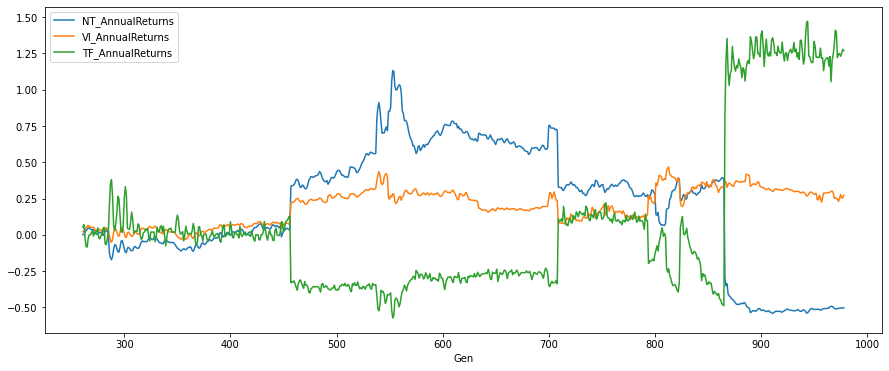

In [3]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)

print('Including r = 0.01 as risk free rate')

TValueNT = (SharpeNT - 0.01) / np.sqrt((1 + 0.5 * SharpeNT**2)/T)
TValueVI = (SharpeVI - 0.01) / np.sqrt((1 + 0.5 * SharpeVI**2)/T)
TValueTF = (SharpeTF - 0.01) / np.sqrt((1 + 0.5 * SharpeTF**2)/T)
print([TValueNT,TValueVI,TValueTF])


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [4]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

In [5]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [6]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [7]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

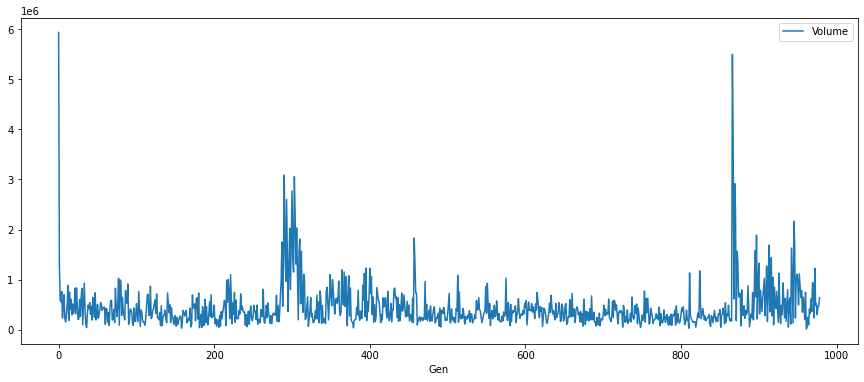

0      5.932343e+06
1      1.261625e+06
2      6.097002e+05
3      5.567455e+05
4      7.658600e+05
           ...     
974    5.152664e+05
975    3.038894e+05
976    4.751687e+05
977    4.776719e+05
978    6.436006e+05
Name: Volume, Length: 979, dtype: float64


In [8]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

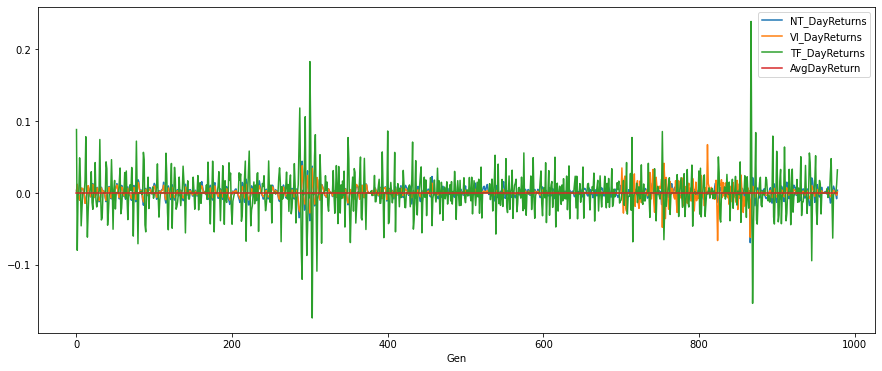

In [9]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

0.3592511013244808
7.763023493360572


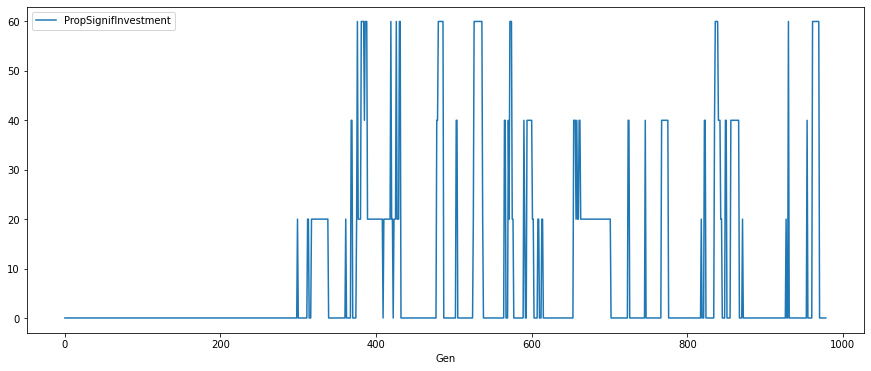

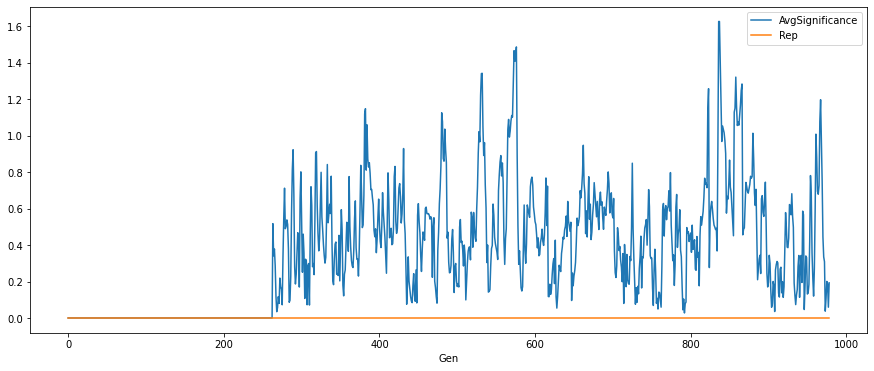

In [10]:
print(df['AvgSignificance'].mean())
print(df['PropSignifInvestment'].mean())
df.plot(x="Gen", y = ["PropSignifInvestment"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["AvgSignificance", "Rep"],
        kind="line", figsize=(15, 6))
plt.show()

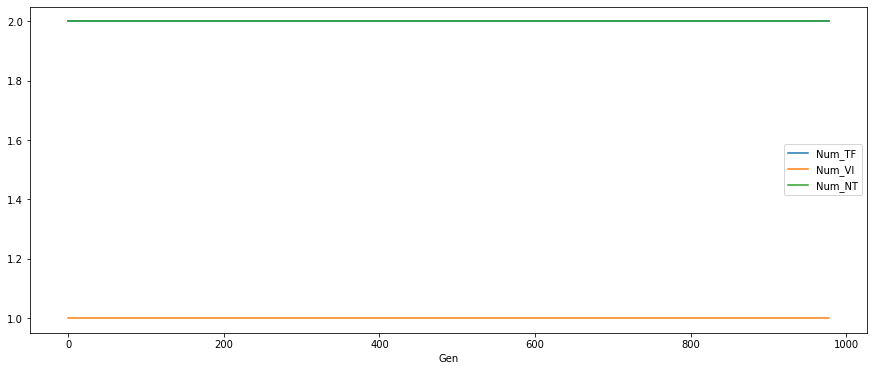

In [11]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


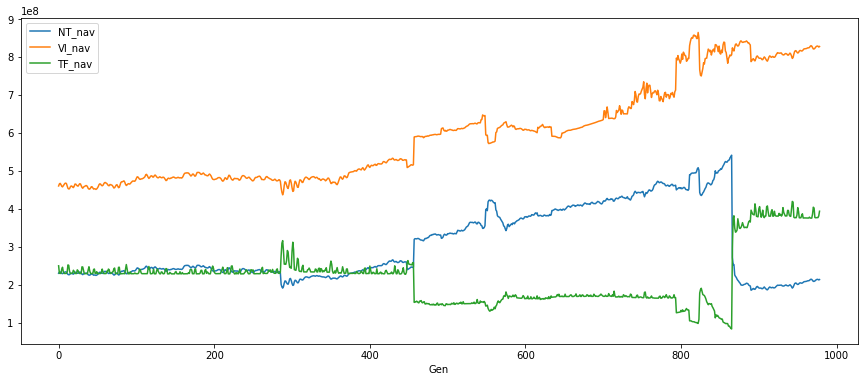

In [12]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


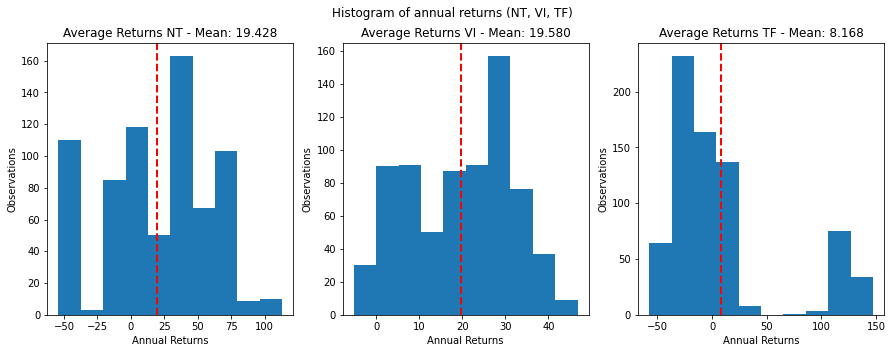

In [13]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [14]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.4999184530446579


In [15]:
''' Significance test '''

data = pd.DataFrame()
data['NT'] = df['NT_AnnualReturns'].iloc[-252*2:]
data['VI'] = df['VI_AnnualReturns'].iloc[-252*2:]
data['TF'] = df['TF_AnnualReturns'].iloc[-252*2:]

def Sharpe(arr):
    sharpe = np.nanmean(arr) / np.nanstd(arr)
    se = np.sqrt((1 + 0.5 * sharpe ** 2)/len(arr))
    result = [sharpe, se]
    return result

print('Full data Sharpe ')
print([Sharpe(df['NT_AnnualReturns']),Sharpe(df['VI_AnnualReturns']),Sharpe(df['TF_AnnualReturns'])])

print('Last 2Y Sharpe')
print(len(data['NT']))
print([Sharpe(data['NT']),Sharpe(data['VI']),Sharpe(data['TF'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-20:]

print('Last 20 days Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-252*20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-252*20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-252*20:]

print('Last 20Y Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])



Full data Sharpe 
[[0.4791554918813608, 0.033744745631164356], [1.62623396199285, 0.04870455058588168], [0.1527777156743463, 0.03214609327385737]]
Last 2Y Sharpe
504
[[0.6010641974217246, 0.04839977134750018], [3.1253465445370576, 0.10804811824644125], [0.1865438291364969, 0.04492938242341321]]
Last 20 days Sharpe
20
[[-97.06040567053381, 15.348226566063415], [12.973823180345489, 2.063492718153313], [16.088524548134583, 2.5536279199206424]]
Last 20Y Sharpe
979
[[0.4791554918813608, 0.033744745631164356], [1.62623396199285, 0.04870455058588168], [0.1527777156743463, 0.03214609327385737]]


In [16]:
popsize = 5
import numpy as np
from scipy.special import stdtrit

generation = 100
returns_tracker = np.random.rand(generation,popsize)
# print(returns_tracker)

ReinvestmentRate = 1.2
returns_tracker[:,1] = -1 * returns_tracker[:,1]
# print(returns_tracker)
InvestmentHorizon = 5


def Investment(returns_tracker, InvestmentHorizon, generation):
    ReturnData = returns_tracker[generation-InvestmentHorizon:generation,:]
    InvestmentRatios = [np.nan] * popsize
    # print(ReturnData)
    # It correctly takes the last 5 points
    SharpeList = [0] * popsize

    TestThreshold = stdtrit(InvestmentHorizon, 0.95)
    TestValues1 = [0] * popsize

    for i in range(popsize):
        DataSlice = ReturnData[:,i]
        MeanReturns = np.nanmean(DataSlice)
        StdReturns = np.nanstd(DataSlice)
        if StdReturns != 0:
            Sharpe = MeanReturns / StdReturns
        else:
            Sharpe = np.nan

        SESharpe = np.sqrt(1 + 0.5 * Sharpe ** 2) / np.sqrt(InvestmentHorizon)
        SharpeList[i] = Sharpe
        DailyInterestRate = 0.01 / 252
        TValue = (Sharpe - DailyInterestRate) / SESharpe
        TestValues1[i] = TValue

        # Replacement by a continuous mechanism
    SumTValues = sum(TestValues1)
    countSignif = 0
    for i in range(popsize):
        InvestmentRatios[i] = TestValues1[i] / SumTValues
        if TestValues1[i] > TestThreshold:
            countSignif += 1

    return countSignif, InvestmentRatios

countSignif, InvestmentRatios = Investment(returns_tracker, 3, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 5, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 50, generation)
print([countSignif, InvestmentRatios])

[1, [0.36270819668035675, -0.39873840677604155, 0.3909912510889531, 0.32446473668966513, 0.32057422231706656]]
[4, [0.3262176877696476, -0.32645130625549407, 0.34836929315949805, 0.3253792573599828, 0.3264850679663656]]
[4, [0.32642321042045974, -0.343514367631066, 0.360626636568443, 0.33992315370469983, 0.3165413669374634]]
